# Titanic ML

This will be a simple machine learning project to predict the survival of passengers on the Titanic. The data is from the Kaggle competition [Titanic: Machine Learning from Disaster](https://www.kaggle.com/c/titanic).



In [9]:
import numpy as np  # linear algebra
import pandas as pd  # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import os
for dirname, _, filenames in os.walk('titanic'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


titanic\gender_submission.csv
titanic\test.csv
titanic\train.csv


### Read Data

In [11]:
titanic_df = pd.read_csv("titanic/train.csv")
test_df = pd.read_csv('titanic/test.csv')
gender_df = pd.read_csv('titanic/gender_submission.csv')

### Data Information

In [13]:
titanic_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [14]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Here, we can see that Age and Cabin have missing values. We will need to deal with these later.

In [15]:
titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

There is also a lot of missing data in the Cabin column. 

<AxesSubplot:>

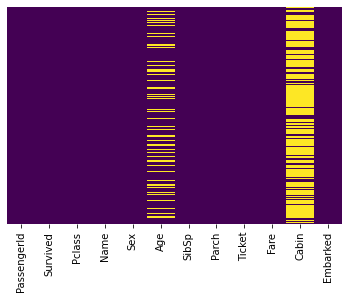

In [16]:
sns.heatmap(titanic_df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [ ]:
PassengerId, Name, Ticket should not affect the survival rate, so we can drop them. We will also drop Cabin because it has too many missing values.

In [17]:
titanic_df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'],
                axis=1,
                inplace=True)


In [ ]:
For missing values in Age, we can fill them with the mean age. But we cannot do that for Embarked because it is a categorical feature. So we will drop the rows with missing values in Embarked.

To be more accurate, we will fill missing values in the "Age" column with the mean age of the passengers in the same class and of the same gender.

In [18]:
titanic_df.dropna(subset=['Embarked'],inplace=True)

titanic_df['Age'] = titanic_df.groupby(
    ['Sex', 'Pclass'])['Age'].apply(lambda row: row.fillna(row.mean()))

titanic_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.00,1,0,7.2500,S
1,1,1,female,38.00,1,0,71.2833,C
2,1,3,female,26.00,0,0,7.9250,S
3,1,1,female,35.00,1,0,53.1000,S
4,0,3,male,35.00,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.00,0,0,13.0000,S
887,1,1,female,19.00,0,0,30.0000,S
888,0,3,female,21.75,1,2,23.4500,S
889,1,1,male,26.00,0,0,30.0000,C


In [ ]:
Our final dataset looks like this:

In [19]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    object 
 3   Age       889 non-null    float64
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Fare      889 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 62.5+ KB


In [20]:
print('Total Male Passengers: ', titanic_df['Sex'].value_counts()['male'])
print('Total Female Passengers: ', titanic_df['Sex'].value_counts()['female'])

Total Male Passengers:  577
Total Female Passengers:  312


## Part Two: Data Visualization

Visualization is a great way to get a feel for the data. We can use seaborn and matplotlib to create some plots.

C:\Users\aaaab\AppData\Local\Temp\ipykernel_26544\604696925.py:6: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


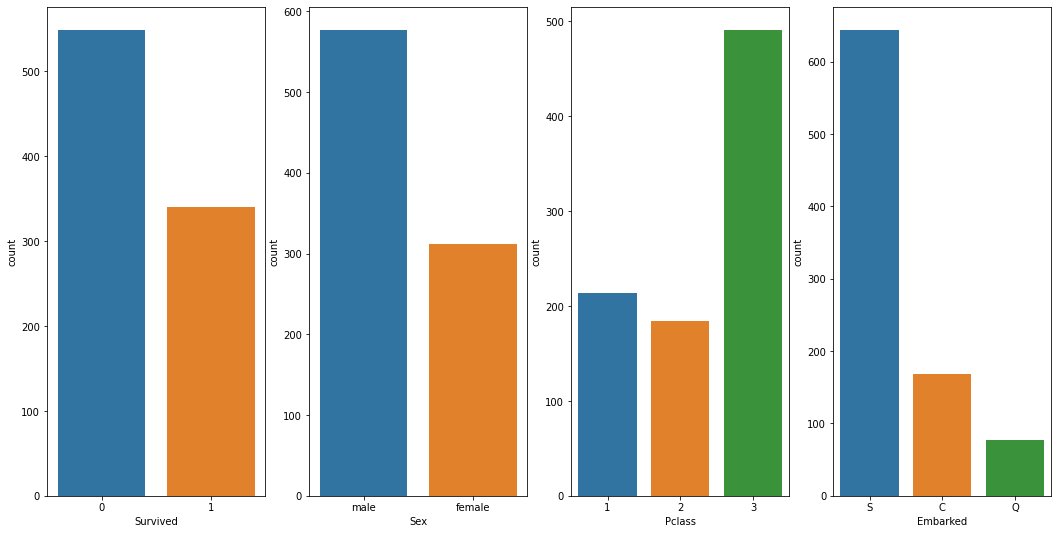

In [21]:
fig, ax = plt.subplots(1, 4, figsize=(18, 9))
sns.countplot(x='Survived', data=titanic_df, ax=ax[0])
sns.countplot(x='Sex', data=titanic_df, ax=ax[1])
sns.countplot(x='Pclass', data=titanic_df, ax=ax[2])
sns.countplot(x='Embarked', data=titanic_df, ax=ax[3])
fig.show()

Here we can gain some insite on the data:
 - Most of the passengers did not survive
 - Most of the passengers were male
 - Most of the passengers were in class 3
 - Most of them embarked from Southampton

<AxesSubplot:xlabel='Survived', ylabel='count'>

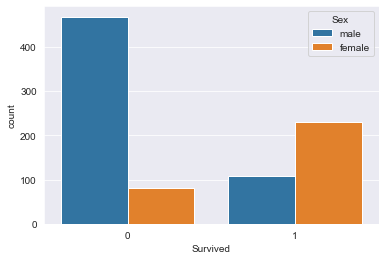

In [22]:
sns.set_style('darkgrid')
sns.countplot(x='Survived', hue='Sex', data=titanic_df)

Most of the passengers who survived were female.

<AxesSubplot:xlabel='Survived', ylabel='count'>

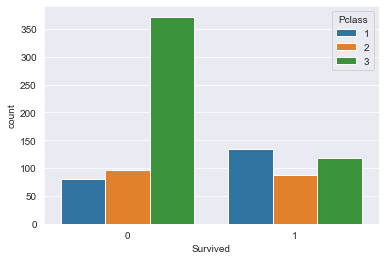

In [23]:
sns.set_style('darkgrid')
sns.countplot(x='Survived', hue='Pclass', data=titanic_df)

Most of the passengers who survived were in class 1.

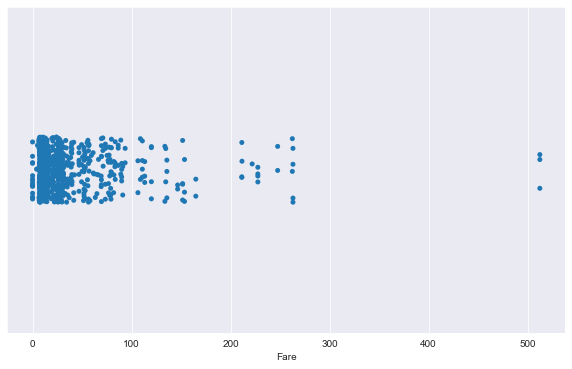

In [24]:
plt.figure(figsize=(10, 6))
sns.stripplot(x='Fare', data=titanic_df)
plt.show()

The most common fare prices were between 0 and 50.

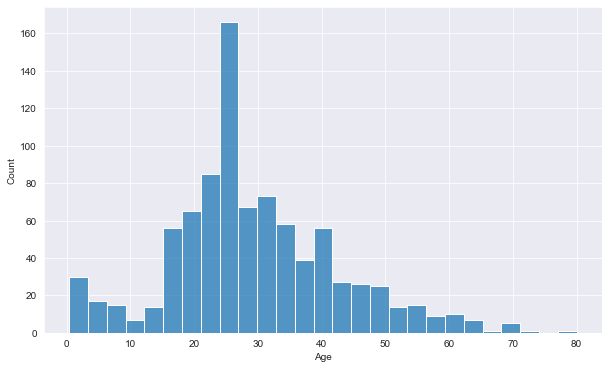

In [25]:
plt.figure(figsize=(10, 6))
sns.histplot(x='Age', data=titanic_df)
plt.show()

The most common age was between 20 and 30.

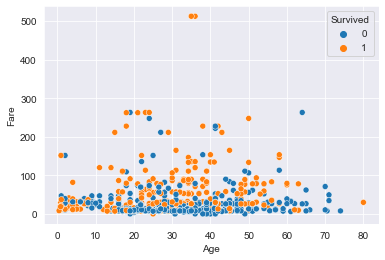

In [31]:
plt.Figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Fare', hue='Survived', data=titanic_df)
plt.show()

There doesn't seem to be an obvious correlation between age and fare. What about Age and PClass?

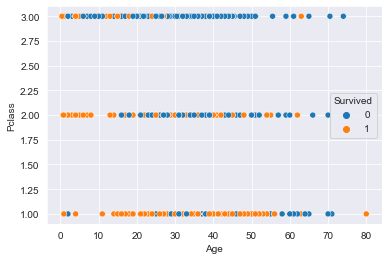

In [32]:
plt.Figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Pclass', hue='Survived', data=titanic_df)
plt.show()

Here it is interesting, seems like the older the passenger, the higher the class. And older passengers with higher class tend to have higher survival rate.

Simple Correlation Heatmap:

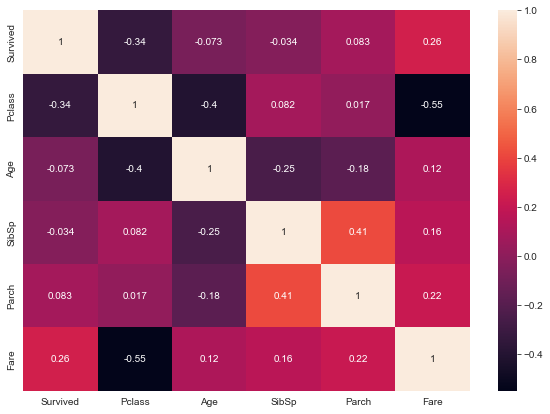

In [26]:
plt.figure(figsize=(10, 7))
sns.heatmap(titanic_df.corr(), annot=True)
plt.show()

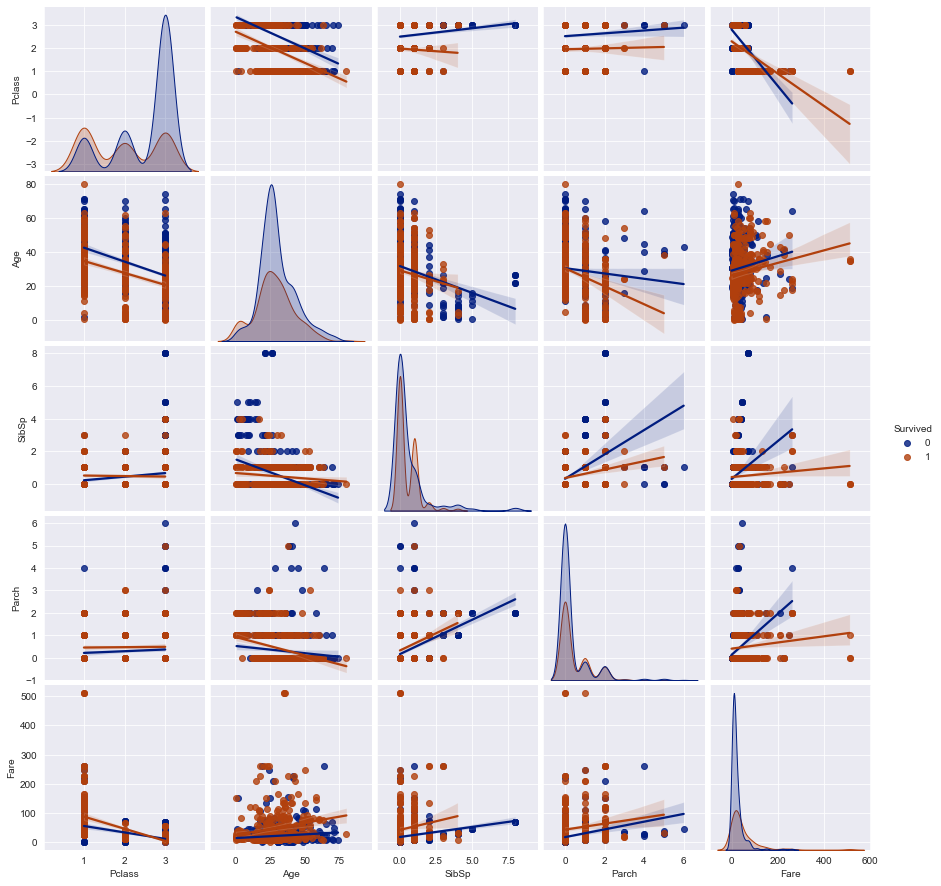

In [27]:
sns.pairplot(data=titanic_df,
             hue="Survived",
             diag_kind="kde",
             kind="reg",
             palette="dark",
             corner=False,
             dropna=True,
             height=2.5,
             aspect=1)
plt.show()